In [3]:
import pandas as pd

In [4]:
review = pd.read_csv("all_reviews.csv")

In [3]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19345 entries, 0 to 19344
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             19345 non-null  object 
 1   City               19345 non-null  object 
 2   Place Type         19345 non-null  object 
 3   Place Category     19345 non-null  object 
 4   Place Name         19345 non-null  object 
 5   Rating             19345 non-null  float64
 6   Review Text        19143 non-null  object 
 7   Reviewer Language  19345 non-null  object 
dtypes: float64(1), object(7)
memory usage: 1.2+ MB


In [4]:
review.columns

Index(['Region', 'City', 'Place Type', 'Place Category', 'Place Name',
       'Rating', 'Review Text', 'Reviewer Language'],
      dtype='object')

In [5]:
import pandas as pd
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download sto
#
#
#
# pwords if not done already
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Step 1.1: Drop rows with missing Review Text
review = review.dropna(subset=['Review Text'])

review.shape

(19143, 8)

In [7]:
# Step 1.2: Remove duplicate rows (based on Review Text + Place Name)
review = review.drop_duplicates(subset=['Review Text', 'Place Name'])
review.shape

(17762, 8)

In [8]:
# Step 1.1: Drop rows with missing Review Text
review = review.dropna(subset=['Review Text'])
review.shape

(17762, 8)

In [9]:
# Step 1.2: Remove duplicate rows (based on Review Text + Place Name)
review = review.drop_duplicates(subset=['Review Text', 'Place Name'])
review.shape

(17762, 8)

In [10]:
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# make sure NLTK resources are downloaded
import nltk
nltk.download('punkt')
nltk.download('stopwords')

# Step 1.3: Define the cleaning function
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = word_tokenize(text)  # tokenize
    stop_words = set(stopwords.words('english'))  # define stopwords
    tokens = [word for word in tokens if word not in stop_words]  # remove stopwords
    return ' '.join(tokens)  # rejoin cleaned words

# Apply to your DataFrame
review['Cleaned Review'] = review['Review Text'].apply(clean_text)

# Check the result
print(review['Cleaned Review'][0])


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


location best good chains outlets available within km distance rooms big amenities served try room service comment checkin checkout smooth cleanliness could improved


In [11]:
# Step 1.4: Apply cleaning
review['Cleaned Review'] = review['Review Text'].apply(clean_text)


In [12]:
#checking one cleaned review
review['Cleaned Review'][0]

'location best good chains outlets available within km distance rooms big amenities served try room service comment checkin checkout smooth cleanliness could improved'

## ✅ Filter to Keep Only English Reviews


In [13]:
# Define allowed English language tags
allowed_langs = ['en', 'en-us']

# Filter to keep only rows with 'en' or 'en-US' (case-insensitive)
review = review[review['Reviewer Language'].str.lower().isin(allowed_langs)]

# Reset index
review = review.reset_index(drop=True)

# Check result
print(f"Remaining rows after keeping only English reviews: {len(review)}")
print("Languages kept:")
print(review['Reviewer Language'].value_counts())


Remaining rows after keeping only English reviews: 17355
Languages kept:
Reviewer Language
en       15585
en-US     1770
Name: count, dtype: int64


## ✅ Step 3: Sentiment Analysis (Labeling Reviews, dummy model)


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

# Download the lexicon
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
vader = SentimentIntensityAnalyzer()

# Apply sentiment scoring
def get_sentiment_scores(text):
    return vader.polarity_scores(text)

# Create new sentiment columns
sentiment_scores = review['Cleaned Review'].apply(get_sentiment_scores).apply(pd.Series)

# Merge back to review DataFrame
review = pd.concat([review, sentiment_scores], axis=1)

# Label sentiment based on compound score
def label_sentiment(compound):
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

review['Sentiment Label'] = review['compound'].apply(label_sentiment)

# Preview results
print(review[['Cleaned Review', 'compound', 'Sentiment Label']].sample(5))


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbookpro/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                          Cleaned Review  compound  \
4893   best park town big spacious lots activities pl...    0.2960   
16470  excellent place visit tickets must purchased o...    0.9601   
11300  good branch barns cafes believe could add staf...    0.4404   
16403  dr café coffee sulaimaniyah decent spot though...    0.9260   
13299  people friendly rooms clean location pretty mu...    0.8020   

      Sentiment Label  
4893         positive  
16470        positive  
11300        positive  
16403        positive  
13299        positive  


<Axes: >

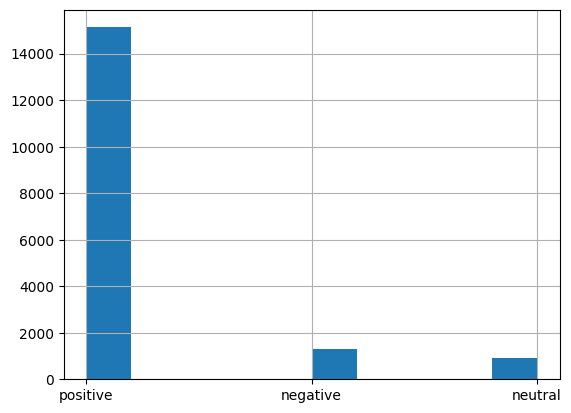

In [15]:
review["Sentiment Label"].hist()

In [16]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17355 entries, 0 to 17354
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Region             17355 non-null  object 
 1   City               17355 non-null  object 
 2   Place Type         17355 non-null  object 
 3   Place Category     17355 non-null  object 
 4   Place Name         17355 non-null  object 
 5   Rating             17355 non-null  float64
 6   Review Text        17355 non-null  object 
 7   Reviewer Language  17355 non-null  object 
 8   Cleaned Review     17355 non-null  object 
 9   neg                17355 non-null  float64
 10  neu                17355 non-null  float64
 11  pos                17355 non-null  float64
 12  compound           17355 non-null  float64
 13  Sentiment Label    17355 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.9+ MB


## City/Region Sentiment Insights

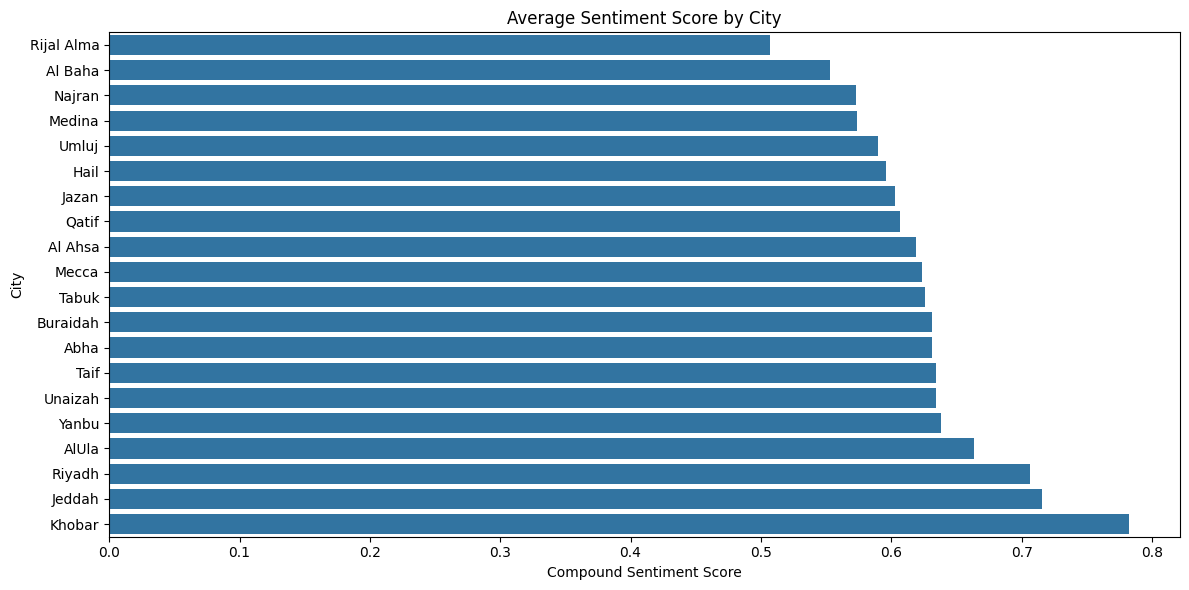

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average sentiment score by city
city_sentiment = review.groupby('City')['compound'].mean().sort_values()

plt.figure(figsize=(12, 6))
sns.barplot(x=city_sentiment.values, y=city_sentiment.index)
plt.title("Average Sentiment Score by City")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("City")
plt.tight_layout()
plt.show()


## Mismatch Detection — Rating vs Sentiment


In [18]:
# Add mismatch flag
review['Mismatch'] = review.apply(
    lambda row: 'Mismatch' if (row['compound'] > 0.5 and row['Rating'] <= 2.5) or
                                     (row['compound'] < -0.5 and row['Rating'] >= 4.0)
    else 'Aligned',
    axis=1
)

# Show samples
print(review[review['Mismatch'] == 'Mismatch'][['Place Name', 'Rating', 'compound', 'Sentiment Label']].sample(5))


                        Place Name  Rating  compound Sentiment Label
6844                  Snowy Forest     2.5    0.6884        positive
10957                       ALBAIK     4.0   -0.5423        negative
12854        Ramez Shopping Center     4.0   -0.7964        negative
10959                       ALBAIK     4.0   -0.7579        negative
3194   ريف القصيم للاجنحه الفندقيه     4.0   -0.8715        negative


## Category-Level Emotion Trends


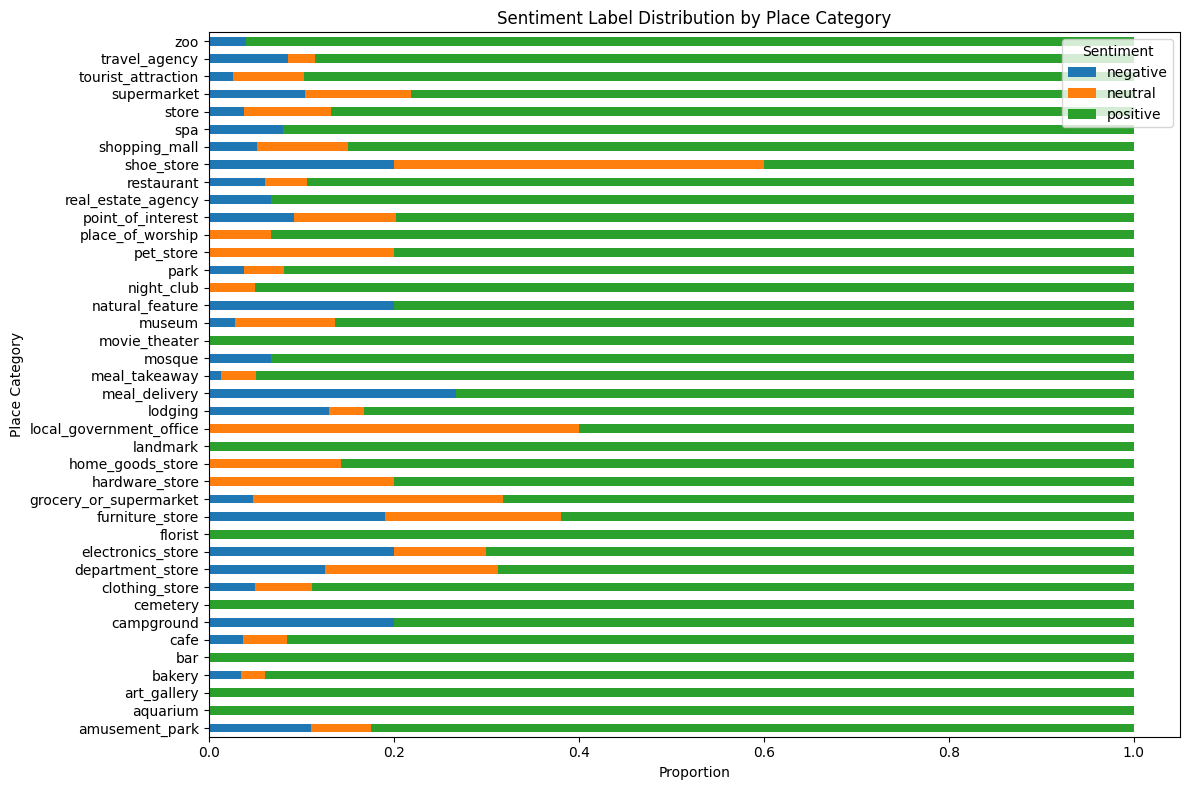

In [19]:
# Count of emotion labels by place category
emotion_counts = review.groupby(['Place Category', 'Sentiment Label']).size().unstack().fillna(0)

# Normalize for proportions
emotion_props = emotion_counts.div(emotion_counts.sum(axis=1), axis=0)

emotion_props.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title("Sentiment Label Distribution by Place Category")
plt.xlabel("Proportion")
plt.ylabel("Place Category")
plt.legend(title="Sentiment")
plt.tight_layout()
plt.show()


## Building a streamlit app

### ✅ Next Step: Save Your DataFrame as CSV for Streamlit


In [20]:
#review.to_csv("review_data.csv", index=False)

In [21]:
#!pip install streamlit


In [22]:
#!pip show streamlit


In [23]:
#!pip install --upgrade streamlit

### ✅ Update Your Streamlit App

In [24]:
import streamlit as st
import pandas as pd

@st.cache_data
def load_data():
    return pd.read_csv("review_data.csv")

review = load_data()

st.title("Saudi Tourism Review Analyzer 🇸🇦")
st.subheader("Raw Data Preview")
st.dataframe(review.head())


2025-04-25 14:33:19.183 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-04-25 14:33:19.185 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-04-25 14:33:19.186 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-25 14:33:19.589 
  command:

    streamlit run /Users/macbookpro/.pyenv/versions/3.10.6/envs/Beyond_the_Stars/lib/python3.10/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-04-25 14:33:19.591 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-25 14:33:19.592 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-25 14:33:19.786 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
20

DeltaGenerator()

In [25]:
import streamlit as st
import pandas as pd

@st.cache_data
def load_data():
    return pd.read_csv("review_data.csv")

review = load_data()

st.title("Saudi Tourism Review Analyzer")
st.dataframe(review.head())


2025-04-25 14:33:19.838 No runtime found, using MemoryCacheStorageManager
2025-04-25 14:33:19.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-25 14:33:19.869 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-25 14:33:19.874 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-25 14:33:19.875 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [6]:
review_data= pd.read_csv("review_data.csv")
review_data = review_data.sample(frac=1).reset_index(drop=True)
review_data

,Region,City,Place Type,Place Category,Place Name,Rating,Review Text,Reviewer Language,Cleaned Review,neg,neu,pos,compound,Sentiment Label,Mismatch
0,Central,Buraidah,restaurant,restaurant,مطعم & لاونج لي شارمنت,3.8,The place was nice and the staffs are very acc...,en,place nice staffs accommodating credit manager...,0.000,0.470,0.530,0.9601,positive,Aligned
1,Central,Buraidah,shopping_mall,shopping_mall,Al Jedai Mall,3.9,The return of forbidden wearing short😅. Dont g...,en,return forbidden wearing short😅 dont go al oth...,0.203,0.797,0.000,-0.4215,negative,Aligned
2,West,Mecca,restaurant,restaurant,Makkah Restaurant,4.1,Very very very unhygienic maintained\nThe floo...,en,unhygienic maintained floors chipchip could fe...,0.028,0.653,0.320,0.9692,positive,Aligned
3,East,Al Ahsa,cafe,cafe,Barn's | بارنز,4.4,Ice shaken white mocha is the best !,en,ice shaken white mocha best,0.153,0.353,0.494,0.5994,positive,Aligned
4,South,Jazan,shopping_mall,shopping_mall,Hyper Crash Prices,4.1,More nice when i see a lot of changing and mor...,en,nice see lot changing choices attractive outsi...,0.000,0.771,0.229,0.8225,positive,Aligned
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17350,South,Al Baha,restaurant,restaurant,شباك شامي,4.1,Excellent food quality and service. The owner ...,en,excellent food quality service owner kind help...,0.000,0.447,0.553,0.8720,positive,Aligned
17351,West,Mecca,tourist_attraction,museum,Clock Tower Museum,4.5,The Clock Tower Museum in Makkah is an incredi...,en,clock tower museum makkah incredible place vis...,0.000,0.741,0.259,0.9509,positive,Aligned
17352,North,Umluj,shopping_mall,shopping_mall,ارض استثمارية ورثة حسين عبدالرحمن الشريف,3.6,Excellent,en-US,excellent,0.000,0.000,1.000,0.5719,positive,Aligned
17353,West,Medina,tourist_attraction,lodging,Madinah Hilton,4.4,I always struggle to decide where to eat in Ma...,en,always struggle decide eat madina place truly ...,0.028,0.432,0.540,0.9916,positive,Aligned
